# A1.3 Regresión lineal múltiple

1. En este primer bloque de código se importa el archivo A1.3NASA.csv utilizando la función read_csv de la librería pandas. Posteriormente, con shape se muestran las dimensiones del DataFrame y, finalmente, mediante la función head se imprimen las primeras 15 filas del archivo.

In [1]:
import pandas as pd
df = pd.read_csv("A1.3NASA.csv")
print("Dimensiones data frame: ",df.shape)
print(df.head(15))

Dimensiones data frame:  (1503, 6)
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500     0

2. En este segundo bloque de código se realiza la partición de los datos, asignando el 70% al conjunto de entrenamiento mediante la variable train, mientras que el 30% restante se almacena en la variable test para evaluar el modelo. Posteriormente, se imprimen las dimensiones de ambos conjuntos y, mediante una suma, se verifica que la cantidad total de registros corresponda al número de datos originales.

In [2]:
train = df.sample(frac = 0.7)
test = df.drop(train.index)
print("Train:", train.shape)
print("Test:",test.shape)
print("Total:",len(train)+len(test))

Train: (1052, 6)
Test: (451, 6)
Total: 1503


3. En este bloque de código se entrena un modelo de regresión lineal múltiple. Primero, se definen las variables independientes X (todas las columnas excepto presión) y la variable dependiente Y (presión). Posteriormente, se ajusta el modelo utilizando la librería statsmodels a través de la función OLS. Finalmente, con ayuda de summary se imprimen los coeficientes estimados y los datos de la regresión, y mediante pvalues se muestran los valores p de manera más exacta.

In [3]:
import statsmodels.api as sm
X = train.drop('presion', axis = 1)
Y = train.presion
model = sm.OLS(Y,sm.add_constant(X))
results = model.fit()
print(results.summary())
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          1.41e-167
Time:                        21:24:47   Log-Likelihood:                -3127.6
No. Observations:                1052   AIC:                             6267.
Df Residuals:                    1046   BIC:                             6297.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.8328      0.635    210.617      0.0

4. Analizando los resultados obtenidos, se observa que todos los p-values son considerablemente menores a 0.05, lo que indica que todas las variables presentan una asociación lineal significativa con la variable de salida. Por otro lado, al examinar el estadístico t, se aprecia que todas las variables tienen valores absolutos elevados, lo cual refuerza su relevancia en el modelo. Sin embargo, dado que la variable frecuencia presenta el mayor valor absoluto del estadístico t, puede considerarse como la más importante dentro del modelo al tener un efecto más consistente.

5. En este bloque de código se calculan RSE y R² tanto para el conjunto de train como para el de test.  

Para los datos de train, se obtienen las predicciones yhatTest y se calculan el RSE y el R², utilizando las fórmulas:  

$$
RSE = \sqrt{\frac{RSS}{n - m - 1}}, \qquad R^2 = 1 - \frac{RSS}{TSS}
$$

Para los datos de entrenamiento, se emplean:  
  - results.scale (raíz cuadrada) para obtener el RSE.  
  - results.rsquared para calcular el R².  


In [5]:
import numpy as np
XTest = test.drop('presion', axis = 1)
yhatTest = results.predict(sm.add_constant(XTest))
YTest = test.presion
RSSTest = sum((YTest-yhatTest)**2)
TSSTest = sum((YTest-np.mean(YTest))**2)
nTest = XTest.shape[0]
mTest = XTest.shape[1]
RSETest = np.sqrt(RSSTest/(nTest-mTest-1))
R2Test = 1 - RSSTest / TSSTest
print("RSE (test) =", RSETest)
print("R^2 (test) =", R2Test)
print("RSE (train):", (results.scale)**0.5) 
print("R^2 (train):",results.rsquared)

RSE (test) = 5.012867900210956
R^2 (test) = 0.48285198010871333
RSE (train): 4.7441197185966315
R^2 (train): 0.5277146885639297


6. Finalmente, se realiza una visualización para comparar los valores reales de la variable de salida con los valores estimados por el modelo en el conjunto de test. El eje x representa los valores reales de presión sonora (YTest) mientras que el eje y representa los valores estimados de presión (yhatTest).   

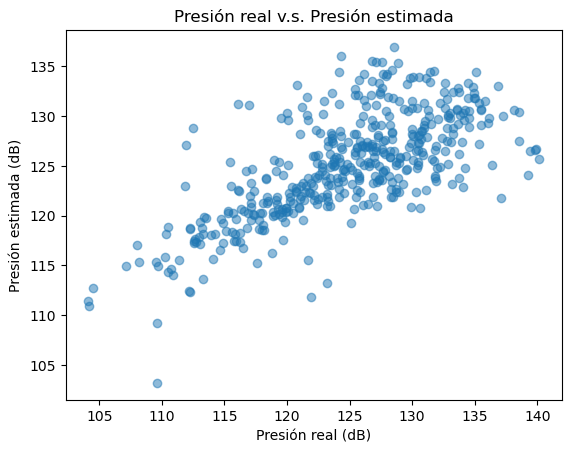

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(YTest, yhatTest, alpha=0.50)
plt.title("Presión real v.s. Presión estimada")
plt.xlabel("Presión real (dB)")
plt.ylabel("Presión estimada (dB)")
plt.show()

En un escenario ideal, para que el modelo fuera perfecto, los puntos de la gráfica tendrían que seguir una recta con pendiente de 1. En este caso, los datos sí tienen una tendencia lineal positiva, sin embargo, no siguen de manera perfecta una línea, e incluso se pueden llegar a observar datos atípicos. Por lo que se puede concluir que, si bien parece seguir la tendencia, no lo hace de manera perfecta. Sería ya con más datos que se podría lograr un mejor entrenamiento, mejorando así la R².